In [6]:
#Import packages


from skimage import io
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl


In [53]:
#alle Werte über dem unteren threshold werden weiss
def multi_otsu_thresholding1(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    #leere Liste für alle within class variances erstellen
    variance_list = list()
    threshold_list = list()

    # optimalen threshhold herausfinden
    for T in range(1,len(counts)):
        for T2 in range(T+1,len(counts)):
        
         #within class variance herausfinden
        
            #definieren von w0 und Hintergrund Mittelwert
            sum_back = 0 
            mean_sum_back = 0
            for i in range(0,T):
                sum_back += counts[i]
                mean_sum_back += counts[i] * bins[i]

            w0 = sum_back / sum(counts)
            mean_back = mean_sum_back / sum_back
        
            #definieren von w1 und Mitte Mittelwert
        
            sum_mid = 0
            mean_sum_mid = 0

            for j in range(T,T2):
                sum_mid += counts[j]
                mean_sum_mid += counts[j] * bins[j]

            w1 = sum_mid / sum(counts)
            if sum_mid != 0 :
                mean_mid = mean_sum_mid / sum_mid


            #definieren von w2 und Vordergrund Mittelwert
            sum_obj = 0
            mean_sum_obj = 0

            for k in range(T2,len(counts)):
                sum_obj += counts[k]
                mean_sum_obj += counts[k] * bins[k]

            w2 = sum_obj / sum(counts)
            mean_obj = mean_sum_obj / sum_obj

            #Varianz Hintergrund
            var_sum_back = 0
            for l in range(0, T):
                var_sum_back += counts[l] * (bins[l] - mean_back)**2 

            var_back = var_sum_back / sum_back
            
            #Varianz Mitte
            var_sum_mid = 0
            if sum_mid != 0:
                for m in range(T,T2):
                    var_sum_mid += counts[m] * (bins[m] - mean_mid)**2 
                if sum_mid != 0:
                    var_mid = var_sum_mid / sum_mid
            
            
            #Varianz Vordergrund
            var_sum_obj = 0
            for n in range(T2, len(counts)):
                var_sum_obj += counts[n] * (bins[n] - mean_obj)**2 

            var_obj = var_sum_obj / sum_obj

            # Within Class Varianz berechnen
            if sum_mid !=0:
                within_class_varianz = w0 * var_back + w1 * var_mid + w2 * var_obj
        
            #within class variance zu Liste hinzufügen
            if sum_mid != 0:
                variance_list.append(within_class_varianz)
            
            #thresholds zur Liste hinzufügen
            if sum_mid != 0:
                threshold_list.append((T,T2))
    
    #minimalen Wert für T aussuchen 
    minvar = min(variance_list)
    for m in range(0,len(variance_list)):
        if variance_list[m] == minvar: 
            p1,p2 = threshold_list[m]
    thresh1 = round(bins[p1])
    thresh2 = round(bins[p2])
    print(thresh1,thresh2)
    
    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < thresh1:
            imgT[p] = 0
        else:
            imgT[p] = 255
    return imgT

47 95


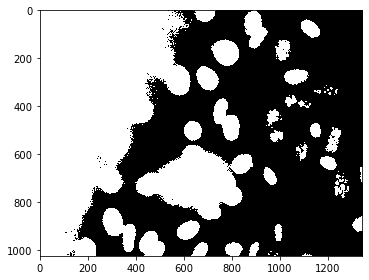

In [54]:

io.imshow(multi_otsu_thresholding1(io.imread('../BilderDaten/BilderDaten/NIH3T3/img/dna-44.png')))



In [50]:
#alle Werte zwischen den beiden thresholds werden weiss, alle anderen schwarz
def multi_otsu_thresholding2(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    #leere Liste für alle within class variances erstellen
    variance_list = list()
    threshold_list = list()

    # optimalen threshhold herausfinden
    for T in range(1,len(counts)):
        for T2 in range(T+1,len(counts)):
        
         #within class variance herausfinden
        
            #definieren von w0 und Hintergrund Mittelwert
            sum_back = 0 
            mean_sum_back = 0
            for i in range(0,T):
                sum_back += counts[i]
                mean_sum_back += counts[i] * bins[i]

            w0 = sum_back / sum(counts)
            mean_back = mean_sum_back / sum_back
        
            #definieren von w1 und Mitte Mittelwert
        
            sum_mid = 0
            mean_sum_mid = 0

            for j in range(T,T2):
                sum_mid += counts[j]
                mean_sum_mid += counts[j] * bins[j]

            w1 = sum_mid / sum(counts)
            if sum_mid != 0 :
                mean_mid = mean_sum_mid / sum_mid


            #definieren von w2 und Vordergrund Mittelwert
            sum_obj = 0
            mean_sum_obj = 0

            for k in range(T2,len(counts)):
                sum_obj += counts[k]
                mean_sum_obj += counts[k] * bins[k]

            w2 = sum_obj / sum(counts)
            mean_obj = mean_sum_obj / sum_obj

            #Varianz Hintergrund
            var_sum_back = 0
            for l in range(0, T):
                var_sum_back += counts[l] * (bins[l] - mean_back)**2 

            var_back = var_sum_back / sum_back
            
            #Varianz Mitte
            var_sum_mid = 0
            if sum_mid != 0:
                for m in range(T,T2):
                    var_sum_mid += counts[m] * (bins[m] - mean_mid)**2 
                if sum_mid != 0:
                    var_mid = var_sum_mid / sum_mid
            
            
            #Varianz Vordergrund
            var_sum_obj = 0
            for n in range(T2, len(counts)):
                var_sum_obj += counts[n] * (bins[n] - mean_obj)**2 

            var_obj = var_sum_obj / sum_obj

            # Within Class Varianz berechnen
            if sum_mid !=0:
                within_class_varianz = w0 * var_back + w1 * var_mid + w2 * var_obj
        
            #within class variance zu Liste hinzufügen
            if sum_mid != 0:
                variance_list.append(within_class_varianz)
            
            #thresholds zur Liste hinzufügen
            if sum_mid != 0:
                threshold_list.append((T,T2))
    
    #minimalen Wert für T aussuchen 
    minvar = min(variance_list)
    for m in range(0,len(variance_list)):
        if variance_list[m] == minvar: 
            p1,p2 = threshold_list[m]
    thresh1 = round(bins[p1])
    thresh2 = round(bins[p2])
    print(thresh1,thresh2)
    
    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < thresh1:
            imgT[p] = 0
        elif img1[p] < thresh2:
            imgT[p] = 255
        else:
            imgT[p] = 0
    return imgT

47 95


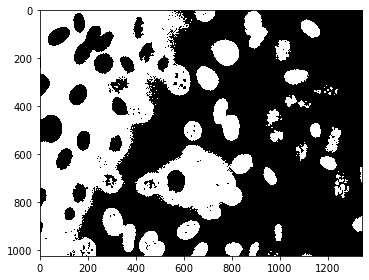

In [55]:
io.imshow(multi_otsu_thresholding2(io.imread('../BilderDaten/BilderDaten/NIH3T3/img/dna-44.png')))

In [59]:
#alle Werte oberhalb dem zweiten threashold werden weiß
def multi_otsu_thresholding3(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    #leere Liste für alle within class variances erstellen
    variance_list = list()
    threshold_list = list()

    # optimalen threshhold herausfinden
    for T in range(1,len(counts)):
        for T2 in range(T+1,len(counts)):
        
         #within class variance herausfinden
        
            #definieren von w0 und Hintergrund Mittelwert
            sum_back = 0 
            mean_sum_back = 0
            for i in range(0,T):
                sum_back += counts[i]
                mean_sum_back += counts[i] * bins[i]

            w0 = sum_back / sum(counts)
            mean_back = mean_sum_back / sum_back
        
            #definieren von w1 und Mitte Mittelwert
        
            sum_mid = 0
            mean_sum_mid = 0

            for j in range(T,T2):
                sum_mid += counts[j]
                mean_sum_mid += counts[j] * bins[j]

            w1 = sum_mid / sum(counts)
            if sum_mid != 0 :
                mean_mid = mean_sum_mid / sum_mid


            #definieren von w2 und Vordergrund Mittelwert
            sum_obj = 0
            mean_sum_obj = 0

            for k in range(T2,len(counts)):
                sum_obj += counts[k]
                mean_sum_obj += counts[k] * bins[k]

            w2 = sum_obj / sum(counts)
            mean_obj = mean_sum_obj / sum_obj

            #Varianz Hintergrund
            var_sum_back = 0
            for l in range(0, T):
                var_sum_back += counts[l] * (bins[l] - mean_back)**2 

            var_back = var_sum_back / sum_back
            
            #Varianz Mitte
            var_sum_mid = 0
            if sum_mid != 0:
                for m in range(T,T2):
                    var_sum_mid += counts[m] * (bins[m] - mean_mid)**2 
                if sum_mid != 0:
                    var_mid = var_sum_mid / sum_mid
            
            
            #Varianz Vordergrund
            var_sum_obj = 0
            for n in range(T2, len(counts)):
                var_sum_obj += counts[n] * (bins[n] - mean_obj)**2 

            var_obj = var_sum_obj / sum_obj

            # Within Class Varianz berechnen
            if sum_mid !=0:
                within_class_varianz = w0 * var_back + w1 * var_mid + w2 * var_obj
        
            #within class variance zu Liste hinzufügen
            if sum_mid != 0:
                variance_list.append(within_class_varianz)
            
            #thresholds zur Liste hinzufügen
            if sum_mid != 0:
                threshold_list.append((T,T2))
    
    #minimalen Wert für T aussuchen 
    minvar = min(variance_list)
    for m in range(0,len(variance_list)):
        if variance_list[m] == minvar: 
            p1,p2 = threshold_list[m]
    thresh1 = round(bins[p1])
    thresh2 = round(bins[p2])
    print(thresh1,thresh2)
    
    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < thresh2:
            imgT[p] = 0
        else:
            imgT[p] = 255
    return imgT

47 95


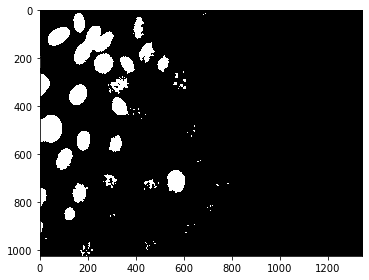

In [60]:
io.imshow(multi_otsu_thresholding3(io.imread('../BilderDaten/BilderDaten/NIH3T3/img/dna-44.png')))